In [1]:
import pandas as pd
df = pd.read_csv("20_Victims_of_rape.csv")
df.sample(5)


Area_Name  Year                Subgroup  Rape_Cases_Reported  \
344     Gujarat  2005   Victims of Other Rape                  305   
350     Gujarat  2007   Victims of Other Rape                  313   
790  Puducherry  2004  Victims of Incest Rape                    0   
512      Kerala  2001   Victims of Other Rape                  558   
159  Chandigarh  2004      Total Rape Victims                   19   

     Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
344                     0                         24   
350                     1                         30   
790                     0                          0   
512                     0                         46   
159                     0                          5   

     Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
344                         39                        210   
350                         50                        180   
790                          0                          0   
512                        125                        305   
159                          3                          5   

     Victims_Between_30-50_Yrs  Victims_of_Rape_Total  Victims_Upto_10_Yrs  
344                         16                    305                   16  
350                         36                    314                   17  
790                          0                      0                    0  
512                         64                    558                   18  
159                          1                     19                    5

In [2]:
df.shape

(1050, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
Area_Name                    1050 non-null object
Year                         1050 non-null int64
Subgroup                     1050 non-null object
Rape_Cases_Reported          1050 non-null int64
Victims_Above_50_Yrs         1050 non-null int64
Victims_Between_10-14_Yrs    1050 non-null int64
Victims_Between_14-18_Yrs    1050 non-null int64
Victims_Between_18-30_Yrs    1050 non-null int64
Victims_Between_30-50_Yrs    1050 non-null int64
Victims_of_Rape_Total        1050 non-null int64
Victims_Upto_10_Yrs          1050 non-null int64
dtypes: int64(9), object(2)
memory usage: 90.3+ KB


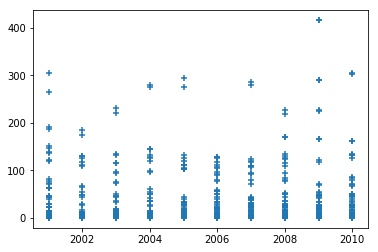

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df["Year"],df["Victims_Between_10-14_Yrs"],marker='+')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(df["area"], df["price"],marker='v')

In [ ]:
df.describe(include='object')

In [ ]:
df.drop("Subgroup",axis =1,inplace =True)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
# df.drop("Subgroup",axis =1,inplace =True)

In [ ]:
df.info()

In [ ]:
X=df.drop(["Year"],axis =1)
y =df["Year"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=11) 
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
model = RandomForestRegressor(random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
err = mean_squared_error(y_test, y_pred)
print(err)
print(model.score(X_test, y_test))
from math import sqrt
err2 = sqrt(err)
print(err2)

In [ ]:
from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, accuracy_score
model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# err = mean_squared_error(y_test, y_pred)
# print(err)
print(model.score(X_test, y_test))
# from math import sqrt
# err2 = sqrt(err)
# print(err2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
model = XGBClassifier(random_state=11, subsample= 0.6,
 reg_alpha= 0.01,
 min_child_weight= 7,
 max_depth= 5,
 gamma= 0.0,
 eta= 0.01,
colsample_bytree= 0.6)
model.fit(X_train, y_train)
model.score(X_test, y_test)